In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn import utils
%matplotlib inline

## Vectorization ##

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.array(np.linspace(0,20,num = 50)).reshape(50,1)
print(X.shape)

(50, 1)


In [3]:
X = np.hstack((np.ones((len(X),1)),X))
print(X)

[[ 1.          0.        ]
 [ 1.          0.40816327]
 [ 1.          0.81632653]
 [ 1.          1.2244898 ]
 [ 1.          1.63265306]
 [ 1.          2.04081633]
 [ 1.          2.44897959]
 [ 1.          2.85714286]
 [ 1.          3.26530612]
 [ 1.          3.67346939]
 [ 1.          4.08163265]
 [ 1.          4.48979592]
 [ 1.          4.89795918]
 [ 1.          5.30612245]
 [ 1.          5.71428571]
 [ 1.          6.12244898]
 [ 1.          6.53061224]
 [ 1.          6.93877551]
 [ 1.          7.34693878]
 [ 1.          7.75510204]
 [ 1.          8.16326531]
 [ 1.          8.57142857]
 [ 1.          8.97959184]
 [ 1.          9.3877551 ]
 [ 1.          9.79591837]
 [ 1.         10.20408163]
 [ 1.         10.6122449 ]
 [ 1.         11.02040816]
 [ 1.         11.42857143]
 [ 1.         11.83673469]
 [ 1.         12.24489796]
 [ 1.         12.65306122]
 [ 1.         13.06122449]
 [ 1.         13.46938776]
 [ 1.         13.87755102]
 [ 1.         14.28571429]
 [ 1.         14.69387755]
 

In [4]:
y = -2*X[:,1]+1
y=y.reshape(len(y),1)
print(y)

[[  1.        ]
 [  0.18367347]
 [ -0.63265306]
 [ -1.44897959]
 [ -2.26530612]
 [ -3.08163265]
 [ -3.89795918]
 [ -4.71428571]
 [ -5.53061224]
 [ -6.34693878]
 [ -7.16326531]
 [ -7.97959184]
 [ -8.79591837]
 [ -9.6122449 ]
 [-10.42857143]
 [-11.24489796]
 [-12.06122449]
 [-12.87755102]
 [-13.69387755]
 [-14.51020408]
 [-15.32653061]
 [-16.14285714]
 [-16.95918367]
 [-17.7755102 ]
 [-18.59183673]
 [-19.40816327]
 [-20.2244898 ]
 [-21.04081633]
 [-21.85714286]
 [-22.67346939]
 [-23.48979592]
 [-24.30612245]
 [-25.12244898]
 [-25.93877551]
 [-26.75510204]
 [-27.57142857]
 [-28.3877551 ]
 [-29.20408163]
 [-30.02040816]
 [-30.83673469]
 [-31.65306122]
 [-32.46938776]
 [-33.28571429]
 [-34.10204082]
 [-34.91836735]
 [-35.73469388]
 [-36.55102041]
 [-37.36734694]
 [-38.18367347]
 [-39.        ]]


In [5]:
def vectorized_gradient(x,y,learning_rate = 0.001,Epoch = 100):
  theta = np.zeros((x.shape[1],1))
  costs = []
  thetas = []
  hypothesis = []
  for i in range(Epoch):
    #calculate hypothesis
    y_hat = np.dot(x,theta)
    hypothesis.append(y_hat)
    #calculate error
    e = y_hat - y
    #mean square error
    mse = (np.dot(e.T,e)/(2*len(y)))[0][0]
    thetas.append(theta.reshape(x.shape[1]))
    costs.append(mse)
    if(i>0 and np.abs(costs[i]-costs[i-1])<0.001):
      print("stopped at iteration {}".format(i))
      break
    #calculate gradients
    gradient = np.dot(x.T,e)/len(y)
    #update theta
    theta = theta - learning_rate*gradient
    
  return np.array(thetas), costs , hypothesis

In [6]:
theta,costs ,hypothesis = vectorized_gradient(X,y)

stopped at iteration 40


## Scatter plot of Epoch vs Mean Square error ##

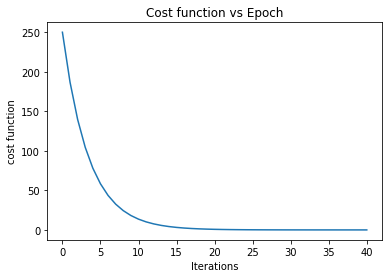

In [7]:
plt.plot(costs)
plt.xlabel("Iterations");
plt.ylabel("cost function");
plt.title("Cost function vs Epoch");


## Scatter plot of theta0 vs Cost ##

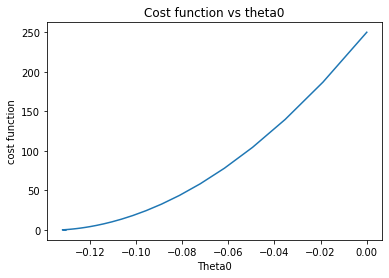

In [8]:
plt.plot(theta[:,0],costs);
plt.xlabel("Theta0");
plt.ylabel("cost function");
plt.title("Cost function vs theta0");


## Scatter plot of theta1 vs Cost ##

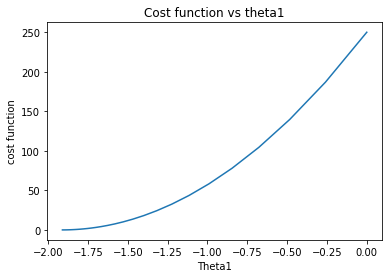

In [9]:
plt.plot(theta[:,1],costs)
plt.xlabel("Theta1")
plt.ylabel("cost function")
plt.title("Cost function vs theta1");

## Model accuracy ##

In [10]:
r2_score(y,hypothesis[-1])

0.9975950054190024

## Load Data ##


In [11]:
x2 = np.linspace(0, 20 ,50)
#np.random.shuffle(x)
y2 = -2*x2+1
from sklearn.utils import shuffle
x2, y2 = shuffle(x2, y2, random_state=0)
print(x2, y2)

[11.42857143  4.48979592  4.08163265 16.73469388  0.81632653 11.02040816
 15.51020408 12.65306122  8.97959184  1.63265306 13.46938776 14.28571429
 10.6122449  13.87755102  7.34693878  2.85714286  5.71428571 18.36734694
 19.59183673 11.83673469  6.12244898 12.24489796 13.06122449  6.53061224
 17.14285714  8.16326531 17.55102041  3.26530612  5.30612245 10.20408163
  2.04081633  6.93877551 16.32653061 20.          0.40816327  4.89795918
 15.10204082  9.79591837  2.44897959  9.3877551  14.69387755  8.57142857
  7.75510204  3.67346939 15.91836735 18.7755102   1.2244898   0.
 19.18367347 17.95918367] [-21.85714286  -7.97959184  -7.16326531 -32.46938776  -0.63265306
 -21.04081633 -30.02040816 -24.30612245 -16.95918367  -2.26530612
 -25.93877551 -27.57142857 -20.2244898  -26.75510204 -13.69387755
  -4.71428571 -10.42857143 -35.73469388 -38.18367347 -22.67346939
 -11.24489796 -23.48979592 -25.12244898 -12.06122449 -33.28571429
 -15.32653061 -34.10204082  -5.53061224  -9.6122449  -19.40816327
  

## Mini batch gradient descent ##

In [12]:
def mini_gradient(x,y,batch_Size,learning_rate = 0.0001, Epoch = 100):
    costs= []
    theta0_list = []
    theta1_list = []
    theta0 = theta1 = 0
    _x= [x[i:i+batch_Size] for i in range(0, len(x), batch_Size)]
    _y= [y[i:i+batch_Size] for i in range(0, len(y), batch_Size)]
    for i in range(Epoch):
      for j in range(len(_x)):
        y_hat = theta0 +theta1*_x[j]
        cost = (1/(2*batch_Size))*np.sum(np.square(y_hat-_y[j]))
        theta0 = theta0 - learning_rate*((1/batch_Size)*np.sum(y_hat-_y[j]))
        theta1 = theta1 - learning_rate*((1/batch_Size)*np.sum((y_hat-_y[j])*_x[j]))
        #print("theta0 = {} , theta1 = {}, cost = {}".format(theta0,theta1,cost))   
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        costs.append(cost)
        if(i>0 and np.abs(costs[i]-costs[i-1])<0.001):
          print("stopped at iteration {}".format(i))
          break
    return costs , theta0_list, theta1_list
            

In [13]:
mini_cost,mini_theta0,mini_theta1=mini_gradient(x2,y2,5)

## Cost function vs Epoch ##

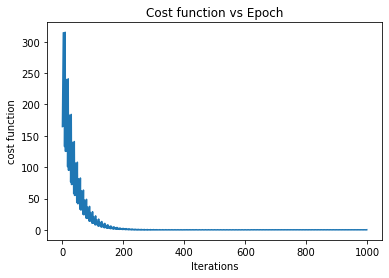

In [14]:
plt.plot(mini_cost)
plt.xlabel("Iterations");
plt.ylabel("cost function");
plt.title("Cost function vs Epoch");

## Cost function vs theta ##





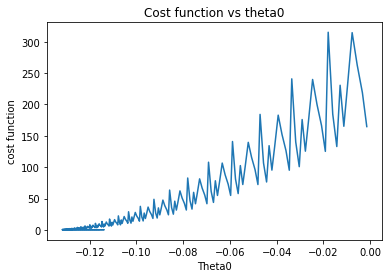

In [15]:
plt.plot(mini_theta0,mini_cost)
plt.xlabel("Theta0");
plt.ylabel("cost function");
plt.title("Cost function vs theta0");

## Cost function vs theta1 ##



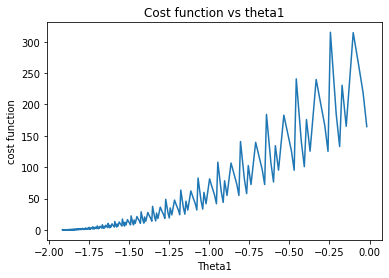

In [16]:
plt.plot(mini_theta1,mini_cost)
plt.xlabel("Theta1");
plt.ylabel("cost function");
plt.title("Cost function vs theta1");

## Model accuracy ##

In [17]:
r2_score(y2,mini_theta0[-1]+mini_theta1[-1]*x2)

0.9976971133164698

## Stochatastic Gradient descent ##

In [18]:
def stochastic_gradient(x,y,learning_rate = 0.0001, Epoch = 100):
    theta0 = theta1 = 0
    theta0_list = []
    theta1_list = []
    cost_list = []
    _cost_list = []
    for i in range(Epoch):
      for j in range(len(x)):
        y_hat = theta0 +theta1*x[j]
        cost = (1/2)*np.square(y_hat-y[j])
        theta0 = theta0 - learning_rate*(y_hat-y[j])
        theta1 = theta1 - learning_rate*(y_hat-y[j])*x[j]
        #print("theta0 = {} , theta1 = {}, cost = {}".format(theta0,theta1,cost))
        cost_list.append(cost) 
        theta0_list.append(theta0)
        theta1_list.append(theta1)
      _cost_list.append(cost)
      if(i>0 and np.abs(cost_list[i]-cost_list[i-1])<0.001):
          print("stopped at iteration {}".format(i))
          break

        
        
        
    return _cost_list,cost_list , theta0_list, theta1_list
    

In [19]:
_colst_list,st_cost_list , st_theta0,st_theta1_list=stochastic_gradient(x2,y2)

## Cost function vs Epoch ##

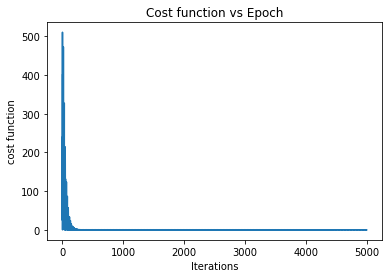

In [20]:
plt.plot(st_cost_list)
plt.xlabel("Iterations")
plt.ylabel("cost function")
plt.title("Cost function vs Epoch");

## Cost function vs theta0 ##

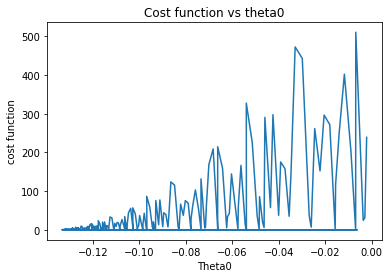

In [21]:
plt.plot(st_theta0,st_cost_list)
plt.xlabel("Theta0");
plt.ylabel("cost function");
plt.title("Cost function vs theta0");

## Cost function vs theta1 ##

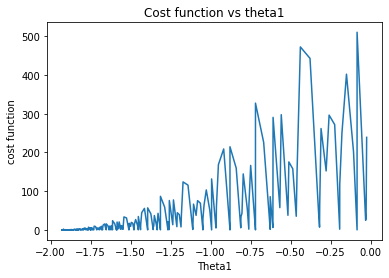

In [22]:
plt.plot(st_theta1_list,st_cost_list)
plt.xlabel("Theta1");
plt.ylabel("cost function");
plt.title("Cost function vs theta1");

## Model accuracy ##

In [23]:
r2_score(y2,st_theta0[-1]+st_theta1_list[-1]*x2)

0.9981192425402361